In [1]:
import redshiftpredictor as rp
import astroFuncs as af
import matplotlib.pyplot as plt

/home/richard/miniconda3/envs/astroWork/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputRegressor from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
af.mastcasjobs_init()

Enter Casjobs username: richardon
Enter Casjobs password: ········


In [3]:
ra = 40
dec = 40
rad = 0.5642
tablename = "redshift_prediction_testrun"


In [4]:
# ps1_data = af.search_circ_region(ra, dec, rad, table_name=tablename)
ps1_data = af.retrieve_table(tablename)
bright_stars = af.search_bright_stars(ra, dec, rad)
resolved_gals = af.search_hleda(ra, dec, rad)

In [5]:
ps1_data

,objID,raMean,decMean,gKronMag,gPSFMag,gKronMagErr,gPSFMagErr,gExtNSigma,rKronMag,rPSFMag,...,zPSFMag,zKronMagErr,zPSFMagErr,zExtNSigma,yKronMag,yPSFMag,yKronMagErr,yPSFMagErr,yExtNSigma,nDetections
0,155320399129939449,39.913042,39.440712,22.059601,21.849199,0.092155,0.058162,-1.016820,21.230400,21.195299,...,20.847900,0.073307,0.045193,-1.103310,-999.000000,20.793800,-999.000000,0.107659,-4.092940,42
1,155320399171338264,39.917015,39.439671,-999.000000,-999.000000,-999.000000,0.874209,-999.000000,-999.000000,24.083700,...,21.305000,0.128468,0.085333,-0.771200,20.895599,20.450800,0.209388,0.101076,-2.419530,8
2,155320399344769988,39.934468,39.441107,19.513500,19.425600,0.010719,0.007443,-0.239108,18.451599,18.404499,...,17.670401,0.006116,0.003990,-0.432801,17.638500,17.515900,0.011502,0.007098,-0.769136,69
3,155320399387319625,39.938729,39.440837,-999.000000,25.518900,-999.000000,1.673960,-999.000000,-999.000000,23.793400,...,22.041700,0.200004,0.133620,0.709970,-999.000000,22.528601,-999.000000,0.636942,-999.000000,0
4,155320399564096189,39.956358,39.437944,20.603901,20.363501,0.022599,0.015315,-0.781750,19.996799,19.920799,...,19.664700,0.033225,0.021040,0.375828,19.452000,19.528000,0.062091,0.039445,2.544660,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72343,156670400751670786,40.075156,40.558442,22.454100,22.946800,0.159346,0.167486,2.016780,21.788300,22.362400,...,22.623100,-999.000000,0.463381,-999.000000,-999.000000,22.487900,-999.000000,0.850990,-999.000000,1
72344,156670400774753484,40.077635,40.560760,-999.000000,-999.000000,-999.000000,1.757940,-999.000000,23.407000,22.900999,...,20.770000,0.106137,0.068480,1.410950,-999.000000,21.498400,-999.000000,0.376184,-999.000000,16
72345,156670400825373081,40.082540,40.560373,18.995399,18.913601,0.007723,0.006052,-0.422744,18.646299,18.560301,...,18.361401,0.014940,0.010148,-0.896361,18.485500,18.456301,0.040599,0.025563,0.656830,48
72346,156670400827110940,40.082698,40.558589,-999.000000,23.627899,-999.000000,0.305525,-999.000000,22.555201,22.770399,...,22.063999,-999.000000,0.226124,-999.000000,-999.000000,21.580500,-999.000000,0.395729,-999.000000,4


In [6]:
cdes, zgrid = rp.generate_redshift_predictions(ps1_data,
                                               bright_stars,
                                               resolved_gals,
                                               n_grid=1000)

100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 206.17it/s]

Generating Predictions


Complete.


In [9]:
def get_cdf(cde):
    res = list()
    cumsum = 0
    # res.append(cumsum)
    for val in cde:
        cumsum = cumsum + val
        res.append(cumsum)
    return res

In [10]:
print(len(cdes))

823


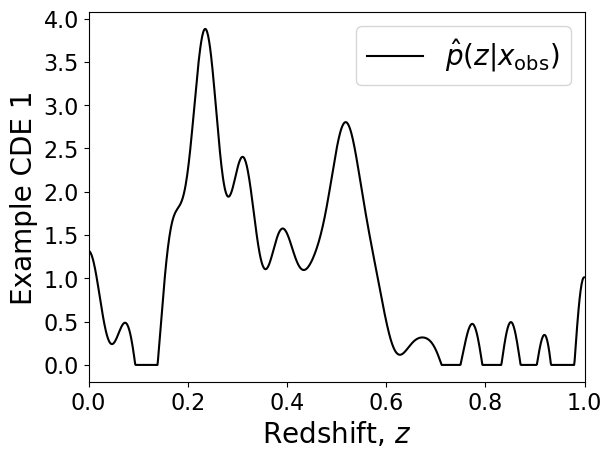

In [11]:
ind = 165
cde = cdes[ind]
plt.plot(zgrid, cde, label=r'$\hat{p}(z| x_{\rm obs})$', c="k")
# plt.axvline(trueZ, color='red', label=r'$z_{\rm obs}$')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'Redshift, $z$', size=20)
plt.ylabel('Example CDE 1', size=20)
plt.xlim(0,1)
plt.legend(loc='upper right', prop={'size': 20})

plt.savefig("example_cde_1.pdf", format="pdf", bbox_inches="tight")
plt.show()

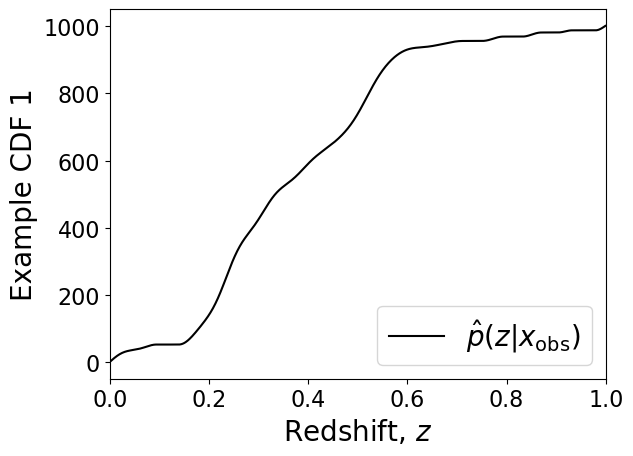

In [12]:
cdf = get_cdf(cde)

plt.plot(zgrid, cdf, label=r'$\hat{p}(z| x_{\rm obs})$', c="k")
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'Redshift, $z$', size=20)
plt.ylabel('Example CDF 1', size=20)
plt.xlim(0,1)
plt.legend(loc='lower right', prop={'size': 20})

plt.savefig("example_cdf_1.pdf", format="pdf", bbox_inches="tight")
plt.show()

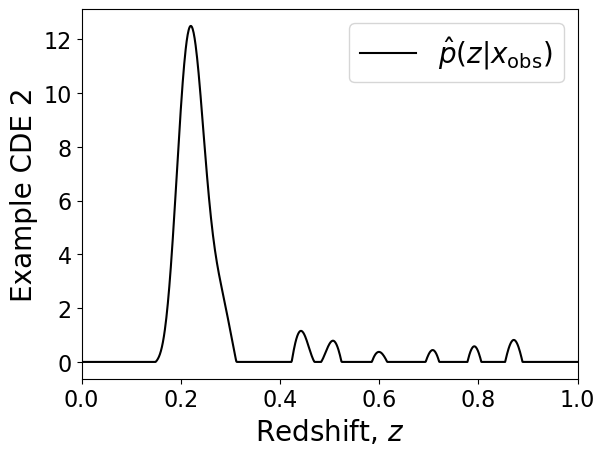

In [15]:
ind = 186
cde = cdes[ind]
plt.plot(zgrid, cde, label=r'$\hat{p}(z| x_{\rm obs})$', c="k")
# plt.axvline(trueZ, color='red', label=r'$z_{\rm obs}$')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'Redshift, $z$', size=20)
plt.ylabel('Example CDE 2', size=20)
plt.xlim(0,1)
plt.legend(loc='upper right', prop={'size': 20})

plt.savefig("example_cde_2.pdf", format="pdf", bbox_inches="tight")
plt.show()


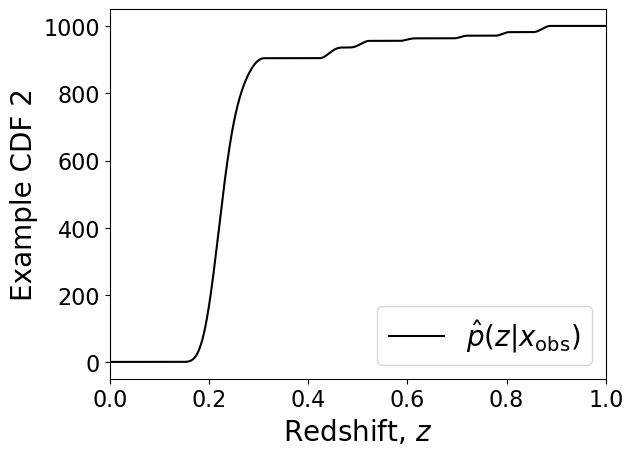

In [16]:
cdf = get_cdf(cde)

plt.plot(zgrid, cdf, label=r'$\hat{p}(z| x_{\rm obs})$', c="k")
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'Redshift, $z$', size=20)
plt.ylabel('Example CDF 2', size=20)
plt.xlim(0,1)
plt.legend(loc='lower right', prop={'size': 20})

plt.savefig("example_cdf_2.pdf", format="pdf", bbox_inches="tight")
plt.show()